## Benchmark ##

Ensure long enough epochs, to test perfomrnace of various hyperparameters

* batchidx
* epochs
* learning rate

No early stopping rules in benchmark testing because we want enough epochs to see the performance trends.

In [1]:
import time
import random
import pandas as pd
import numpy as np
import math
import logging

import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms, datasets, models
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.dataset import random_split


## Define Hyperparameter settings ##

In [2]:
epochs_list = [10, 100]
lr_list = [0.01, 0.001]
batchsize_list = [32]

In [3]:
fname = "data/gt-weekly.zip"
dscol = 'time'
ycols = ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10']

## Pipeline for benchmark testing ##

In [4]:
from preprocessing.preprocessor import LoadData, FindFrequency, PeriodDetect, AlignData, DropExtrema, Normalizer, FillGap, GenerateInput
from modeling.pytorch_ae_benchmark import Benchmark
from pipeline import Pipeline

benchmark_list = [
    LoadData(fname, dscol, ycols),
    FindFrequency(),
    PeriodDetect(),
    AlignData(),
    DropExtrema(),
    Normalizer(),
    FillGap(),
    GenerateInput(),
    Benchmark(epochs_list, lr_list, batchsize_list)
]
benchmark_pipeline = Pipeline()
loss_memory, val_loss_memory = benchmark_pipeline.benchmark_transform(benchmark_list)

Using TensorFlow backend.
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

/Users/preh0405/Desktop/chronos+/notebook
/Users/preh0405/Desktop/chronos+/notebook


Finding frequency:   0%|          | 0/2 [00:00<?, ?it/s]

Detecting Period:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/preh0405/opt/anaconda3/envs/chrono/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Aligning data:   0%|          | 0/2 [00:00<?, ?it/s]

(35279, 10)
(31679, 10)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint'])


Dropping Extrema:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Filling gap:   0%|          | 0/2 [00:00<?, ?it/s]

ok10
ok20
ok11
ok21
(35279, 11)
(31679, 11)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])


Generating Input:   0%|          | 0/2 [00:00<?, ?it/s]

(48, 7200)
(43, 7200)
dict_keys(['ycols', 'dscol', 'orient', 'weekdays', 'weekends'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])
dict_keys(['minfreq', 'colfreqs', 'period', 'anchors', 'zeropoint', 'modnorms', 'profile', 'time_index'])


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch number:0 train_loss: 40332.6474916907 val_loss: 16.928953517558394
epoch number:0 train_loss: 40909.596743721515 val_loss: 26.7432607573985


  0%|          | 0/2 [00:00<?, ?it/s]

epoch number:0 train_loss: 0.023890315555036068 val_loss: 0.009157444830005154
epoch number:0 train_loss: 0.024072835221886635 val_loss: 0.008795743633410492


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch number:0 train_loss: 37719.34827241115 val_loss: 15.599558796172317
epoch number:0 train_loss: 24969.63346242346 val_loss: 37.91146965582897


  0%|          | 0/2 [00:00<?, ?it/s]

epoch number:0 train_loss: 0.029474372044205666 val_loss: 0.010876627230510699
epoch number:0 train_loss: 0.027598939836025238 val_loss: 0.010896427384322772


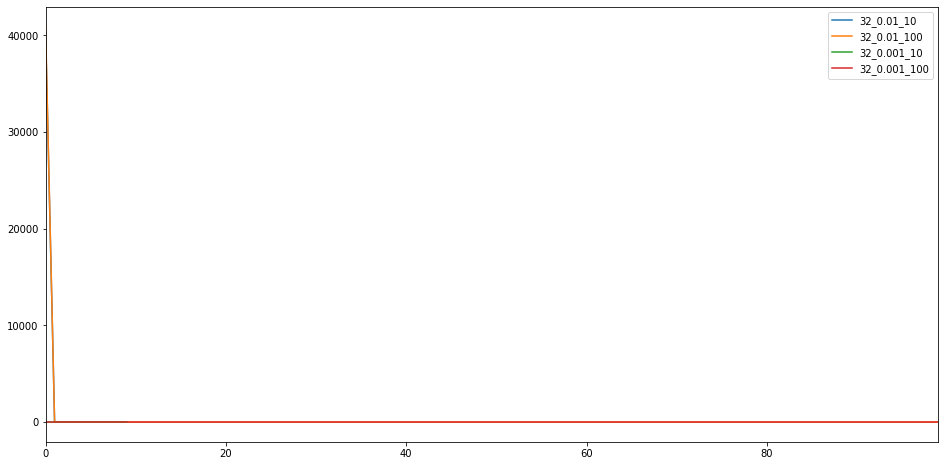

In [5]:
#weekdays
loss_memory[0].plot(figsize=[16,8])

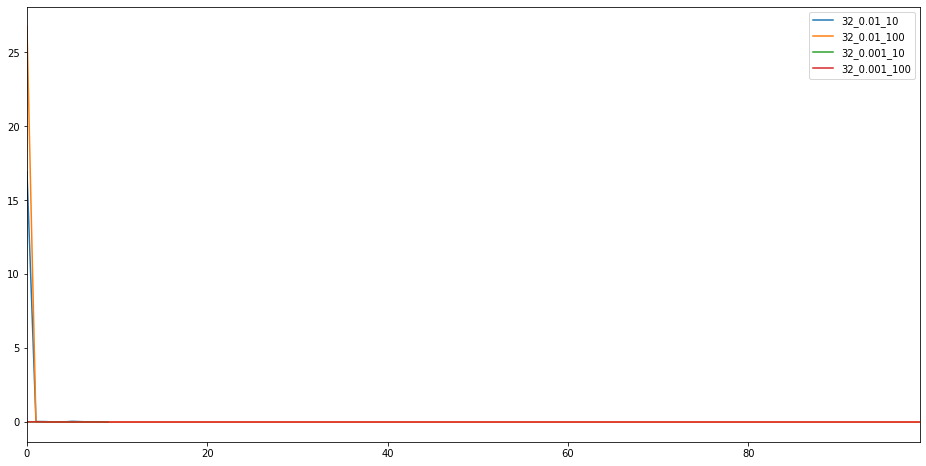

In [6]:
val_loss_memory[0].plot(figsize=[16,8])

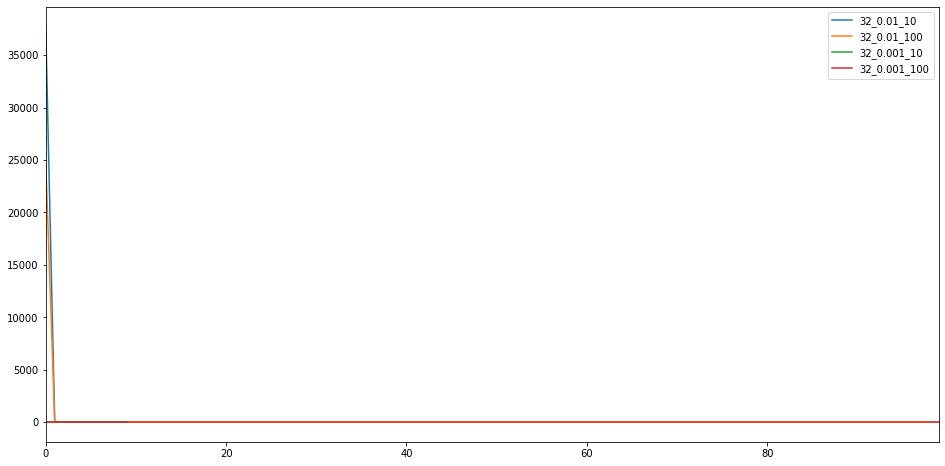

In [7]:
#weekends
loss_memory[1].plot(figsize=[16,8])

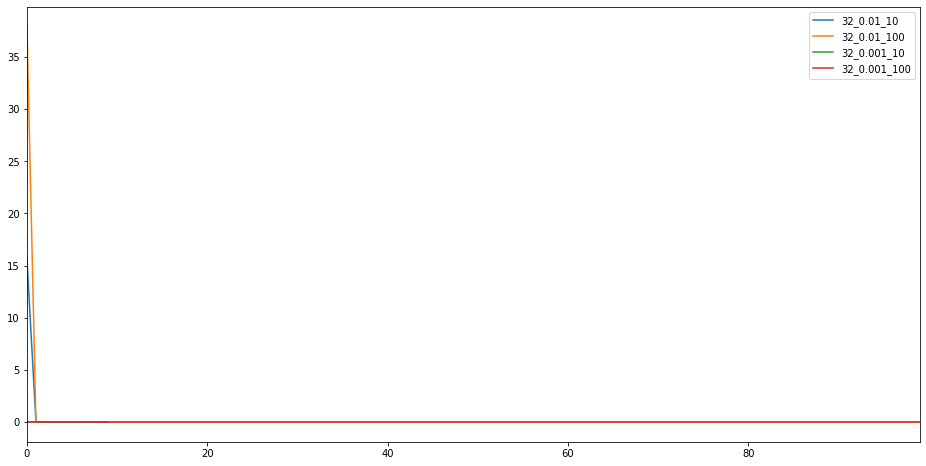

In [8]:
val_loss_memory[1].plot(figsize=[16,8])